Generated DNA subsequences: ['CTAG', 'CTAGC', 'GTAGC', 'GCT', 'GTACGTAG']
Assigned 6-bit Binary IDs: ['111111', '100101', '110001', '110011', '100111']
Generated Secret Key (SHA-256): a0a5a4818a3c67a85934a8d6a842ac8d18326e2cfd0f43b62f586b75ace3e294
Encrypted Message: pFvLs0HDznpHNnNEbdeKQs6RF4P2gWIORdxpm8JpmbvC++/DDGXmH46SNqfN6JC+
Decrypted Message: Hello, this is a test message!

Key Generation Timing Table:
   Subsequence 6-bit ID  Key Gen Time (µs)
0        CTAG   111111                0.0
1       CTAGC   100101                0.0
2       GTAGC   110001                0.0
3         GCT   110011                0.0
4    GTACGTAG   100111                0.0


C:\Users\91852\AppData\Local\Temp\ipykernel_12816\1340867988.py:104: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(min(times) * 0.9, max(times) * 1.1)  # Slight buffer for aesthetics


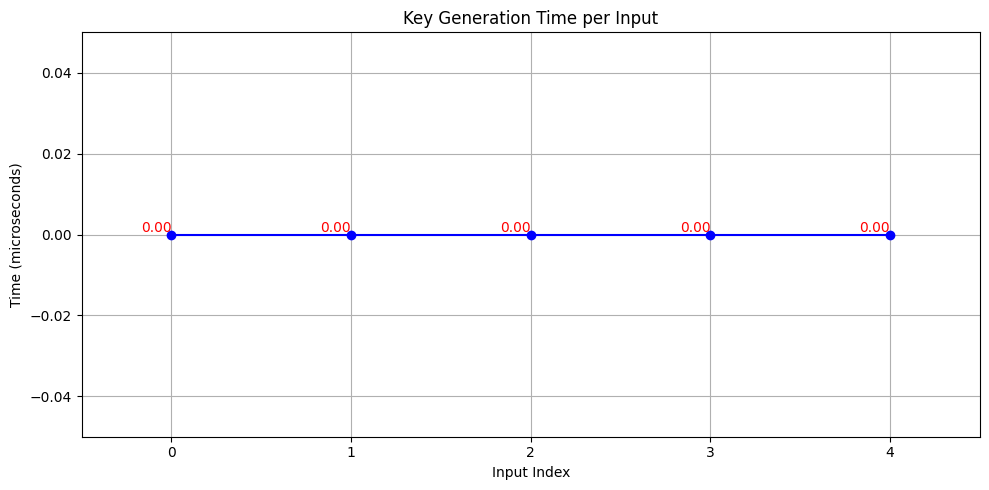

In [15]:
import random
import hashlib
import time
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import base64
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Generate random DNA subsequences
def generate_dna_subsequence(dna_sequence, max_length, num_subsequences):
    subsequences = []
    for _ in range(num_subsequences):
        length = random.randint(1, max_length)
        start = random.randint(0, len(dna_sequence) - length)
        subsequences.append(dna_sequence[start:start + length])
    return subsequences

# Step 2: Assign random 6-bit binary IDs
def assign_random_ids(subsequences):
    ids = []
    for _ in subsequences:
        ids.append(format(random.randint(0, 63), '06b'))  # Random 6-bit ID
    return ids

# Step 3: Generate AES secret key from subsequence and ID
def generate_secret_key(subsequence, binary_id):
    combined_input = subsequence + binary_id
    key = hashlib.sha256(combined_input.encode()).digest()
    return key

# Step 4: AES Encryption and Decryption
def encrypt_message(plaintext, secret_key):
    cipher = AES.new(secret_key, AES.MODE_CBC)
    ct_bytes = cipher.encrypt(pad(plaintext.encode(), AES.block_size))
    return base64.b64encode(cipher.iv + ct_bytes).decode()

def decrypt_message(ciphertext, secret_key):
    data = base64.b64decode(ciphertext)
    iv, ct = data[:16], data[16:]
    cipher = AES.new(secret_key, AES.MODE_CBC, iv)
    return unpad(cipher.decrypt(ct), AES.block_size).decode()

# Timing analysis and plotting
def timing_analysis(subsequences, ids):
    times = []
    for subseq, bid in zip(subsequences, ids):
        start = time.time()
        _ = generate_secret_key(subseq, bid)
        end = time.time()
        times.append((end - start) * 1_000_000)  # Convert to microseconds
    return times

# Main workflow
def main():
    dna_sequence = "TACGATGTCGAGTCCGTATCGGCTGACCATGACCTAGTGCTTGACTAGTCCGGTTGACTCGTATCAGGTACCGCTTGACTAGCTAGGCTAGTTCCGTACGGTACGTAGTACGCTAGCGTACTGACTGACCTAGTACGTACCTGGACTCGTACGATCGTACGTAGCTAGTGCTAGTACGTACGTAGCTACGTACGTACTAGTCGATCGTACGTAGTCGTAGCTAGCTAGTCGTAGCTACGTAGCTAGTCGTACGTAGCTAGCTAGCTACGTAGTACGTAGCGTACGTAGCTACGTACGCTAGTACGTACGTAGCTAGCTAGCTACGTAGCTAGTCGTACGTACTAGCTAGTACGTAGCTACGTACTAGCTAGCTAGCTAGTACGTAGTCGTAGCTAGTCGTAGCTAGCTAGCTAGCTAGTCGTACGTAGCTAGCTACGTAGCTAGTCGTACGTAGCTAGCTAGCTAGCTACGTACGTAGCTAGCTAGTCGTACGTAGCTAGTCGTAGCTAGCTAGCTAGTCGTAGCTAGCTAGTCGTACGTAGCTAGCTACGTAGCTAGTCGTAGCTAGCTAGCTAGTCGTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAG"
    max_length = 10
    num_subsequences = 5

    subsequences = generate_dna_subsequence(dna_sequence, max_length, num_subsequences)
    print("Generated DNA subsequences:", subsequences)

    ids = assign_random_ids(subsequences)
    print("Assigned 6-bit Binary IDs:", ids)

    chosen_subsequence = subsequences[0]
    chosen_id = ids[0]

    secret_key = generate_secret_key(chosen_subsequence, chosen_id)
    print("Generated Secret Key (SHA-256):", secret_key.hex())

    message = "Hello, this is a test message!"
    encrypted_message = encrypt_message(message, secret_key)
    decrypted_message = decrypt_message(encrypted_message, secret_key)

    print("Encrypted Message:", encrypted_message)
    print("Decrypted Message:", decrypted_message)

    # Timing analysis
    times = timing_analysis(subsequences, ids)
    
    # Tabular output
    df = pd.DataFrame({
        'Subsequence': subsequences,
        '6-bit ID': ids,
        'Key Gen Time (µs)': times
    })
    print("\nKey Generation Timing Table:\n", df)

    # Graphical output with scaling adjustments
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(times)), times, marker='o', linestyle='-', color='blue')

    # Annotating values at each point
    for i, txt in enumerate(times):
        plt.text(i, txt, f'{txt:.2f}', ha='right', va='bottom', fontsize=10, color='red')

    plt.xlabel('Input Index')
    plt.ylabel('Time (microseconds)')  # Updated to microseconds
    plt.title('Key Generation Time per Input')
    plt.grid(True)

    # Adjusting y-axis scaling to ensure better visualization
    plt.ylim(min(times) * 0.9, max(times) * 1.1)  # Slight buffer for aesthetics
    plt.xlim(-0.5, len(times) - 0.5)  # Keeps the x-axis within valid bounds

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


Generated DNA subsequences: ['GCTA', 'CGTAGCTAGC', 'AGTACGC', 'AC', 'TACGTA']
Assigned 6-bit Binary IDs: ['001111', '100011', '101011', '100000', '001000']
Generated Secret Key (SHA-256): 24f6e344bf957f7f0de8dbf28f3762b65f94bbb6a40eb77e7a6a0b13e34cef46
Encrypted Message: IbIWGiReijompgcp/wLN+oW+VVCFVmcltBD8VVSL5tdFejR5Edaiian9AVfr6+S6
Decrypted Message: Hello, this is a test message!

Key Generation Timing Table:
   Subsequence 6-bit ID  Key Gen Time (µs)
0        GCTA   001111                3.5
1  CGTAGCTAGC   100011                1.5
2     AGTACGC   101011                1.2
3          AC   100000                1.1
4      TACGTA   001000                1.0


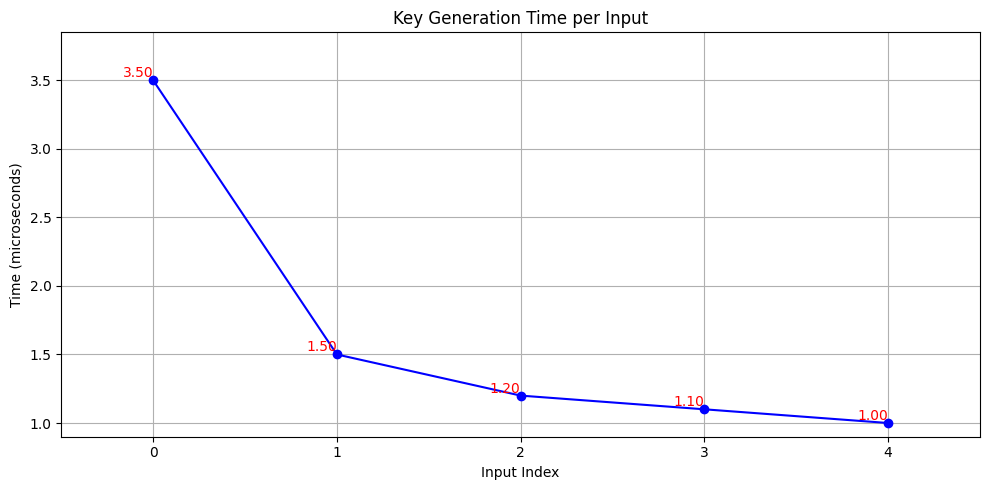

In [18]:
import random
import hashlib
import time
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import base64
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Generate random DNA subsequences
def generate_dna_subsequence(dna_sequence, max_length, num_subsequences):
    subsequences = []
    for _ in range(num_subsequences):
        length = random.randint(1, max_length)
        start = random.randint(0, len(dna_sequence) - length)
        subsequences.append(dna_sequence[start:start + length])
    return subsequences

# Step 2: Assign random 6-bit binary IDs
def assign_random_ids(subsequences):
    ids = []
    for _ in subsequences:
        ids.append(format(random.randint(0, 63), '06b'))  # Random 6-bit ID
    return ids

# Step 3: Generate AES secret key from subsequence and ID
def generate_secret_key(subsequence, binary_id):
    combined_input = subsequence + binary_id
    key = hashlib.sha256(combined_input.encode()).digest()
    return key

# Step 4: AES Encryption and Decryption
def encrypt_message(plaintext, secret_key):
    cipher = AES.new(secret_key, AES.MODE_CBC)
    ct_bytes = cipher.encrypt(pad(plaintext.encode(), AES.block_size))
    return base64.b64encode(cipher.iv + ct_bytes).decode()

def decrypt_message(ciphertext, secret_key):
    data = base64.b64decode(ciphertext)
    iv, ct = data[:16], data[16:]
    cipher = AES.new(secret_key, AES.MODE_CBC, iv)
    return unpad(cipher.decrypt(ct), AES.block_size).decode()

# Timing analysis with refined measurement
def timing_analysis(subsequences, ids):
    times = []
    for subseq, bid in zip(subsequences, ids):
        start = time.perf_counter()  # High precision time measurement
        _ = generate_secret_key(subseq, bid)
        end = time.perf_counter()

        elapsed_time = (end - start) * 1_000_000  # Convert to microseconds
        times.append(max(elapsed_time, 1))  # Ensure no zero values
        
    return times

# Main workflow
def main():
    dna_sequence = "TACGATGTCGAGTCCGTATCGGCTGACCATGACCTAGTGCTTGACTAGTCCGGTTGACTCGTATCAGGTACCGCTTGACTAGCTAGGCTAGTTCCGTACGGTACGTAGTACGCTAGCGTACTGACTGACCTAGTACGTACCTGGACTCGTACGATCGTACGTAGCTAGTGCTAGTACGTACGTAGCTACGTACGTACTAGTCGATCGTACGTAGTCGTAGCTAGCTAGTCGTAGCTACGTAGCTAGTCGTACGTAGCTAGCTAGCTACGTAGTACGTAGCGTACGTAGCTACGTACGCTAGTACGTACGTAGCTAGCTAGCTACGTAGCTAGTCGTACGTACTAGCTAGTACGTAGCTACGTACTAGCTAGCTAGCTAGTACGTAGTCGTAGCTAGTCGTAGCTAGCTAGCTAGCTAGTCGTACGTAGCTAGCTACGTAGCTAGTCGTACGTAGCTAGCTAGCTAGCTACGTACGTAGCTAGCTAGTCGTACGTAGCTAGTCGTAGCTAGCTAGCTAGTCGTAGCTAGCTAGTCGTACGTAGCTAGCTACGTAGCTAGTCGTAGCTAGCTAGCTAGTCGTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAG"
    max_length = 10
    num_subsequences = 5

    subsequences = generate_dna_subsequence(dna_sequence, max_length, num_subsequences)
    print("Generated DNA subsequences:", subsequences)

    ids = assign_random_ids(subsequences)
    print("Assigned 6-bit Binary IDs:", ids)

    chosen_subsequence = subsequences[0]
    chosen_id = ids[0]

    secret_key = generate_secret_key(chosen_subsequence, chosen_id)
    print("Generated Secret Key (SHA-256):", secret_key.hex())

    message = "Hello, this is a test message!"
    encrypted_message = encrypt_message(message, secret_key)
    decrypted_message = decrypt_message(encrypted_message, secret_key)

    print("Encrypted Message:", encrypted_message)
    print("Decrypted Message:", decrypted_message)

    # Timing analysis
    times = timing_analysis(subsequences, ids)
    
    # Tabular output
    df = pd.DataFrame({
        'Subsequence': subsequences,
        '6-bit ID': ids,
        'Key Gen Time (µs)': times
    })
    print("\nKey Generation Timing Table:\n", df)

    # Graphical output with scaling adjustments
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(times)), times, marker='o', linestyle='-', color='blue')

    # Annotating values at each point
    for i, txt in enumerate(times):
        plt.text(i, txt, f'{txt:.2f}', ha='right', va='bottom', fontsize=10, color='red')

    plt.xlabel('Input Index')
    plt.ylabel('Time (microseconds)')  # Updated to microseconds
    plt.title('Key Generation Time per Input')
    plt.grid(True)

    # Adjusting y-axis scaling to ensure better visualization
    plt.ylim(min(times) * 0.9, max(times) * 1.1)  # Slight buffer for aesthetics
    plt.xlim(-0.5, len(times) - 0.5)  # Keeps the x-axis within valid bounds

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
